In [ ]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mum = pd.read_csv("/content/drive/My Drive/datasets/MumbaiAQI.csv",encoding="ISO-8859-1")
ahe = pd.read_csv("/content/drive/My Drive/datasets/AhmedabadAQI.csv",encoding="ISO-8859-1")
aiz = pd.read_csv("/content/drive/My Drive/datasets/AizawlAQI.csv",encoding="ISO-8859-1")
amr = pd.read_csv("/content/drive/My Drive/datasets/AmritsarAQI.csv",encoding="ISO-8859-1")
ben = pd.read_csv("/content/drive/My Drive/datasets/BengaluruAQI.csv",encoding="ISO-8859-1")
bho = pd.read_csv("/content/drive/My Drive/datasets/BhopalAQI.csv",encoding="ISO-8859-1")
bhu = pd.read_csv("/content/drive/My Drive/datasets/BhubaneshwarAQI.csv",encoding="ISO-8859-1")
cha = pd.read_csv("/content/drive/My Drive/datasets/ChandigarhAQI.csv",encoding="ISO-8859-1")
che = pd.read_csv("/content/drive/My Drive/datasets/ChennaiAQI.csv",encoding="ISO-8859-1")
deh = pd.read_csv("/content/drive/My Drive/datasets/DelhiAQI.csv",encoding="ISO-8859-1")
gur = pd.read_csv("/content/drive/My Drive/datasets/GurugramAQI.csv",encoding="ISO-8859-1")
guw = pd.read_csv("/content/drive/My Drive/datasets/GuwahatiAQI.csv",encoding="ISO-8859-1")
hyd = pd.read_csv("/content/drive/My Drive/datasets/HyderabadAQI.csv",encoding="ISO-8859-1")
jai = pd.read_csv("/content/drive/My Drive/datasets/JaipurAQI.csv",encoding="ISO-8859-1")
jor = pd.read_csv("/content/drive/My Drive/datasets/JorapokharAQI.csv",encoding="ISO-8859-1")
kol = pd.read_csv("/content/drive/My Drive/datasets/KolkataAQI.csv",encoding="ISO-8859-1")
luc = pd.read_csv("/content/drive/My Drive/datasets/LucknowAQI.csv",encoding="ISO-8859-1")
pat = pd.read_csv("/content/drive/My Drive/datasets/PatnaAQI.csv",encoding="ISO-8859-1")
shi = pd.read_csv("/content/drive/My Drive/datasets/ShillongAQI.csv",encoding="ISO-8859-1")
thi = pd.read_csv("/content/drive/My Drive/datasets/ThiruvananthapuramAQI.csv",encoding="ISO-8859-1")
vis = pd.read_csv("/content/drive/My Drive/datasets/VisakhapatnamAQI.csv",encoding="ISO-8859-1")

In [ ]:
mum.tail()

,Unnamed: 0,Date,AQI
4465,459601,2020-06-27,64.0
4466,459602,2020-06-28,64.0
4467,459603,2020-06-29,54.0
4468,459604,2020-06-30,54.0
4469,459605,2020-07-01,53.0


In [ ]:
ahe.tail()

,Unnamed: 0,Date,AQI
8260,437746,2020-06-27,92.0
8261,437747,2020-06-28,82.0
8262,437748,2020-06-29,74.0
8263,437749,2020-06-30,98.0
8264,437750,2020-07-01,119.0


In [ ]:
mum.dtypes

Unnamed: 0      int64
Date           object
AQI           float64
dtype: object

In [ ]:
train_df = mum
train_df.rename(mapper = {'Date':'ds','AQI':'y'},axis =1,inplace = True)
train_df.dtypes

Unnamed: 0      int64
ds             object
y             float64
dtype: object

In [ ]:
m = Prophet(holidays_prior_scale=0,seasonality_prior_scale=20,n_changepoints= 50,)
m.fit(train_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
filename='fb.pkl'
pickle.dump(m,open(filename,'wb'))

In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
4002,2021-06-27
4003,2021-06-28
4004,2021-06-29
4005,2021-06-30
4006,2021-07-01


In [ ]:
forecast = m.predict(future)
dff=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4002,2021-06-27,155.153089,82.549538,229.702440
4003,2021-06-28,160.111572,88.206190,229.789180
4004,2021-06-29,160.384880,80.471889,238.385629
4005,2021-06-30,160.576525,87.576252,230.828846
4006,2021-07-01,162.514130,91.921370,233.876417


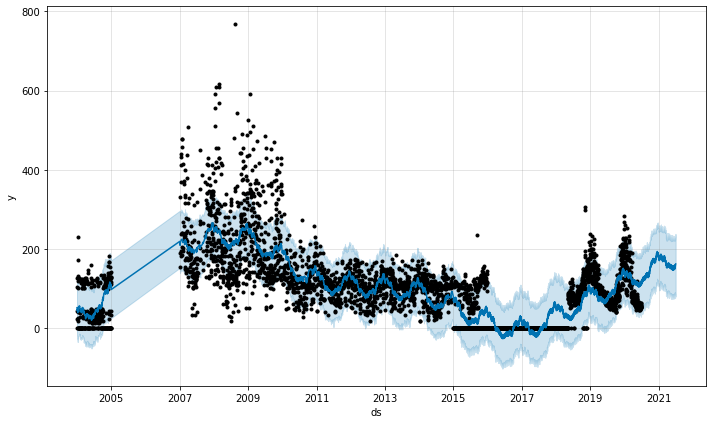

In [ ]:
m.plot(forecast,uncertainty=True)
plt.savefig('Mumbai-Uncertainty.png')

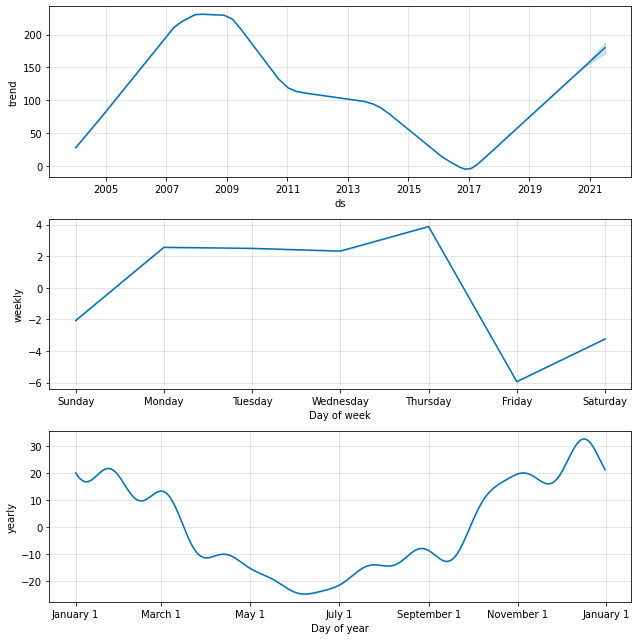

In [ ]:
i=m.plot_components(forecast)
plt.savefig('Mumbai-Forecast.png')

In [ ]:
dff[dff['ds']=='2020-11-18']

,ds,yhat,yhat_lower,yhat_upper
3781,2020-11-18,172.965424,102.908457,245.879509


In [ ]:
dff.to_csv(r"/content/drive/My Drive/datasets/Mumbai.csv")

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


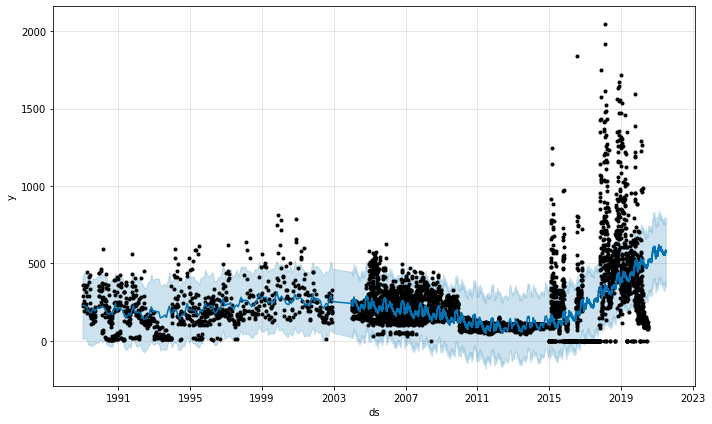

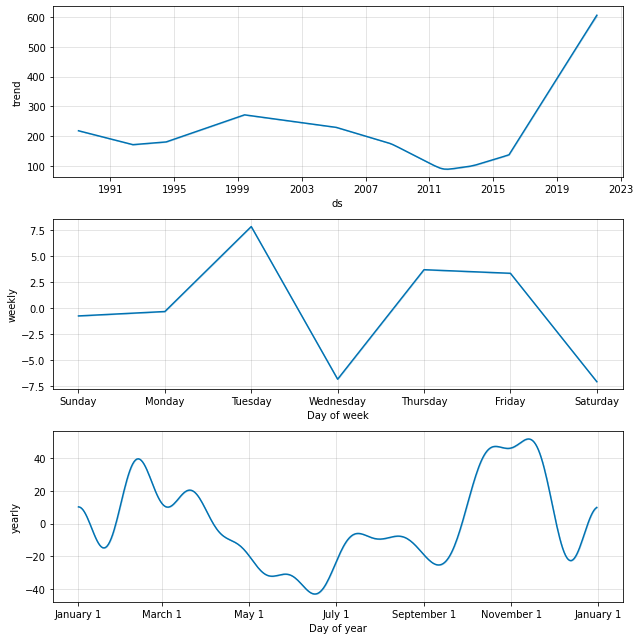

In [ ]:
train_df = ahe
train_df.rename(mapper = {'Date':'ds','AQI':'y'},axis =1,inplace = True)
m = Prophet(holidays_prior_scale=0,seasonality_prior_scale=20,n_changepoints= 50,)
m.fit(train_df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
dff=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dff.to_csv(r"/content/drive/My Drive/datasets/Ahmedabad.csv")
m.plot(forecast,uncertainty=True)
plt.savefig('Ahmedabad-Uncertainty.png')
i=m.plot_components(forecast)
plt.savefig('Ahmedabad-Forecast.png')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5138,2021-06-27,572.502257,370.043245,782.863364
5139,2021-06-28,575.115477,375.955355,785.474352
5140,2021-06-29,585.525991,378.057079,800.384780
5141,2021-06-30,573.136752,365.852656,774.742788
5142,2021-07-01,585.933798,366.726010,795.190242


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


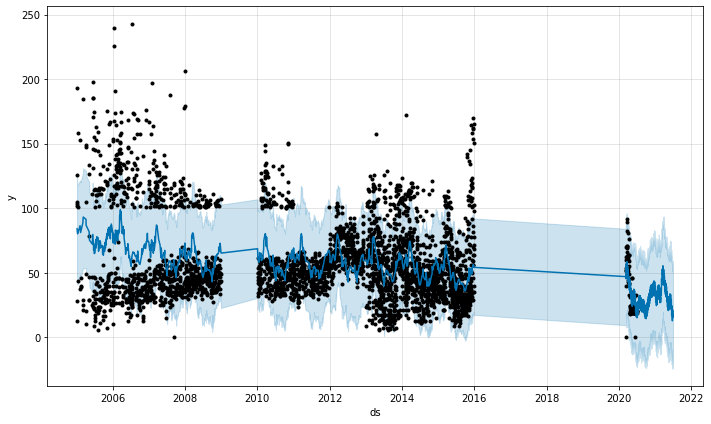

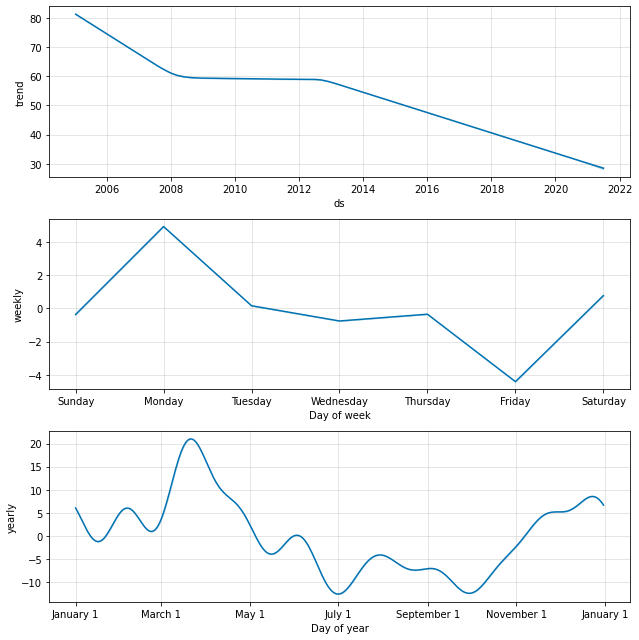

In [ ]:
train_df = aiz
train_df.rename(mapper = {'Date':'ds','AQI':'y'},axis =1,inplace = True)
m = Prophet(holidays_prior_scale=0,seasonality_prior_scale=20,n_changepoints= 50,)
m.fit(train_df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
dff=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dff.to_csv(r"/content/drive/My Drive/datasets/Aizawl.csv")
m.plot(forecast,uncertainty=True)
plt.savefig('Aizawl-Uncertainty.png')
i=m.plot_components(forecast)
plt.savefig('Aizawl-Forecast.png')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1468,2021-06-27,16.121023,-22.374098,57.140478
1469,2021-06-28,21.172001,-18.035478,59.128053
1470,2021-06-29,16.206873,-19.640767,54.384061
1471,2021-06-30,15.170847,-24.099352,50.566240
1472,2021-07-01,15.530522,-19.857140,53.534932


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


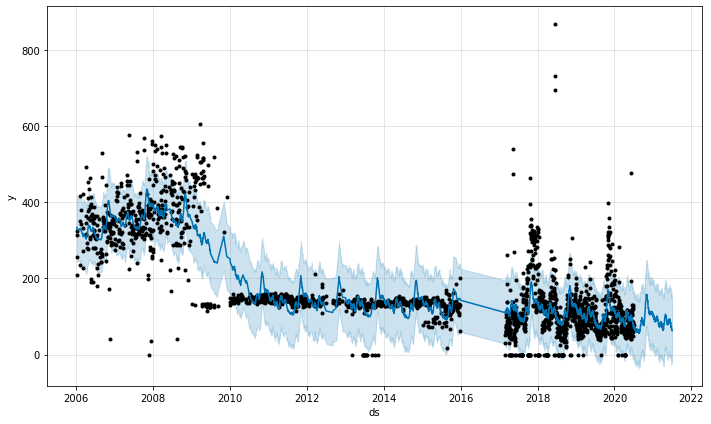

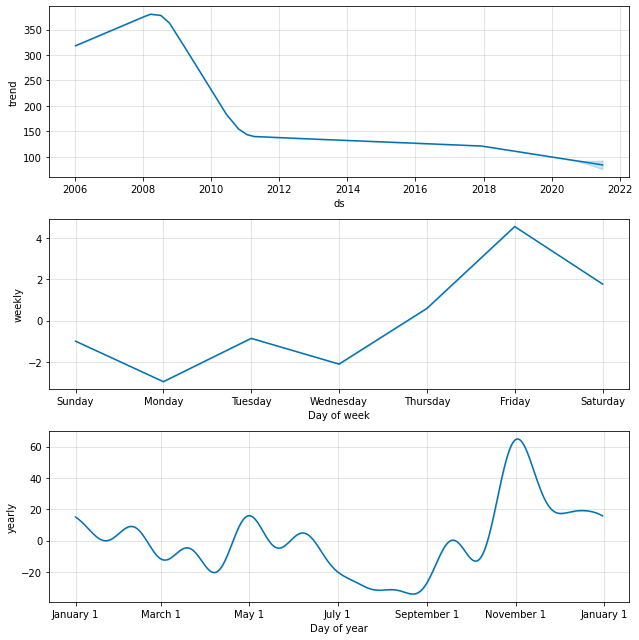

In [ ]:
train_df = amr
train_df.rename(mapper = {'Date':'ds','AQI':'y'},axis =1,inplace = True)
m = Prophet(holidays_prior_scale=0,seasonality_prior_scale=20,n_changepoints= 50,)
m.fit(train_df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
dff=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dff.to_csv(r"/content/drive/My Drive/datasets/Amritsar.csv")
m.plot(forecast,uncertainty=True)
plt.savefig('Amritsar-Uncertainty.png')
i=m.plot_components(forecast)
plt.savefig('Amritsar-Forecast.png')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2737,2021-06-27,66.788427,-19.700560,154.541607
2738,2021-06-28,63.780628,-24.054643,148.016164
2739,2021-06-29,64.922248,-19.998652,153.719683
2740,2021-06-30,62.789654,-17.205690,150.764073
2741,2021-07-01,64.683597,-19.110624,146.685307


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


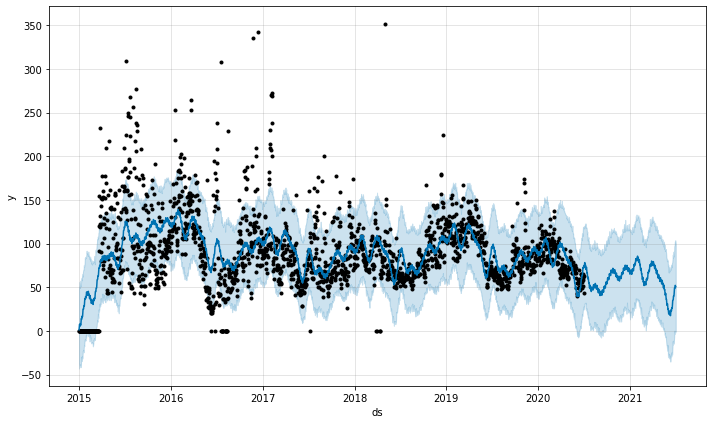

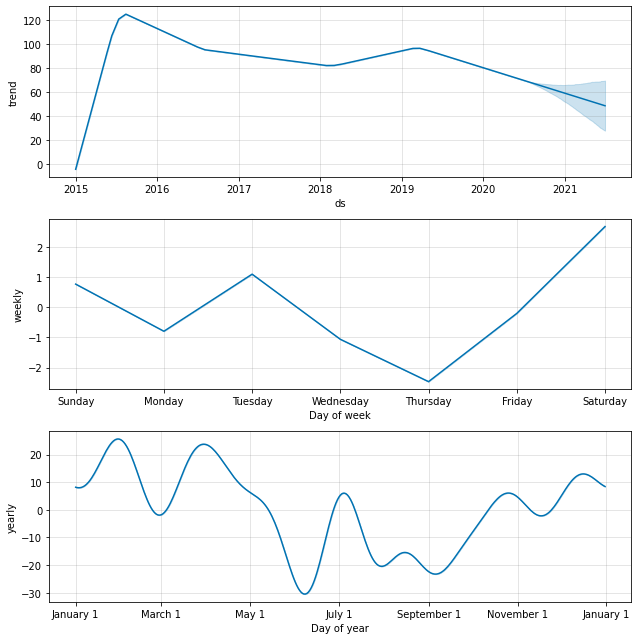

In [ ]:
train_df = ben
train_df.rename(mapper = {'Date':'ds','AQI':'y'},axis =1,inplace = True)
m = Prophet(holidays_prior_scale=0,seasonality_prior_scale=20,n_changepoints= 50,)
m.fit(train_df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
dff=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dff.to_csv(r"/content/drive/My Drive/datasets/Bengaluru.csv")
m.plot(forecast,uncertainty=True)
plt.savefig('Bengaluru-Uncertainty.png')
i=m.plot_components(forecast)
plt.savefig('Bengaluru-Forecast.png')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2369,2021-06-27,49.043603,-1.399191,101.691029
2370,2021-06-28,48.989751,-3.220377,102.863992
2371,2021-06-29,52.201417,-1.140889,103.916373
2372,2021-06-30,51.157684,-0.629179,102.837256
2373,2021-07-01,50.646814,-0.835578,99.850797


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


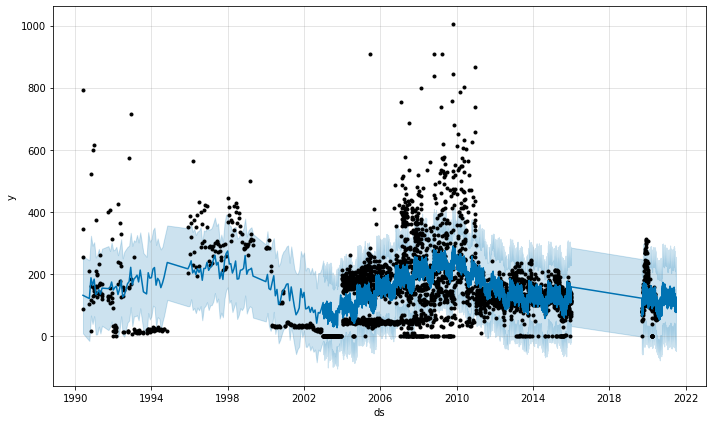

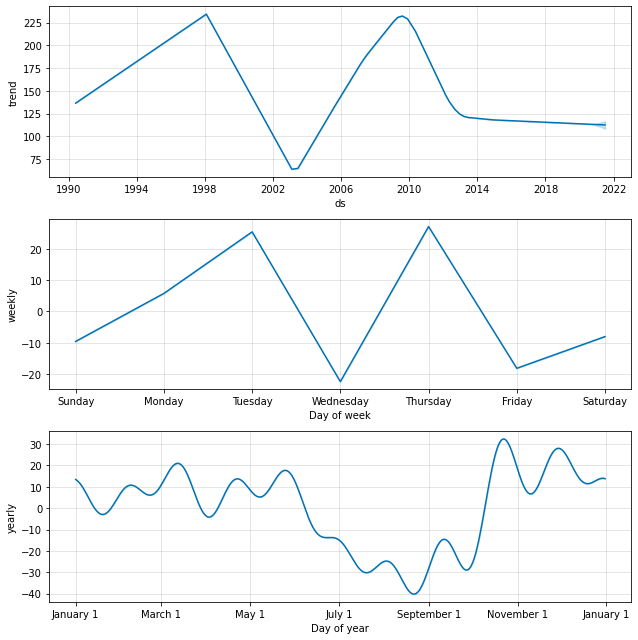

In [ ]:
train_df = bho
train_df.rename(mapper = {'Date':'ds','AQI':'y'},axis =1,inplace = True)
m = Prophet(holidays_prior_scale=0,seasonality_prior_scale=20,n_changepoints= 50,)
m.fit(train_df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
dff=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dff.to_csv(r"/content/drive/My Drive/datasets/Bhopal.csv")
m.plot(forecast,uncertainty=True)
plt.savefig('Bhopal-Uncertainty.png')
i=m.plot_components(forecast)
plt.savefig('Bhopal-Forecast.png')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3559,2021-06-27,89.300099,-34.966863,225.464960
3560,2021-06-28,104.494923,-28.509327,224.335339
3561,2021-06-29,123.919133,4.948994,254.937639
3562,2021-06-30,75.797364,-48.255833,192.245619
3563,2021-07-01,124.858049,6.417101,247.199292


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


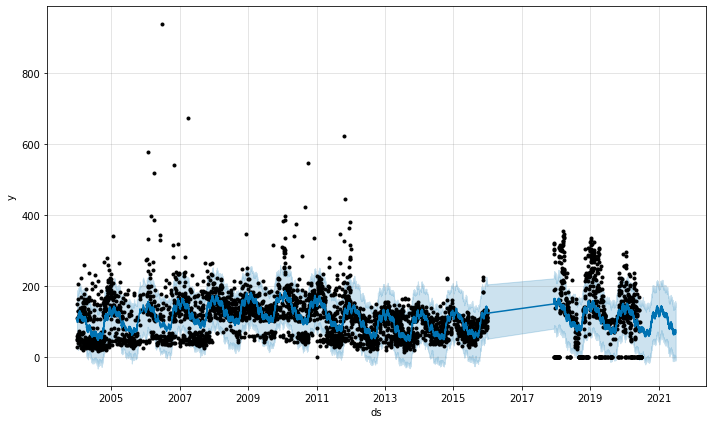

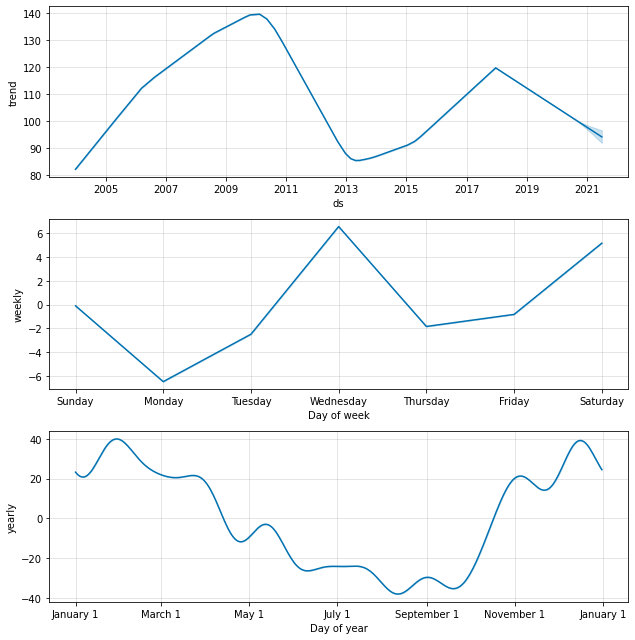

In [ ]:
train_df = bhu
train_df.rename(mapper = {'Date':'ds','AQI':'y'},axis =1,inplace = True)
m = Prophet(holidays_prior_scale=0,seasonality_prior_scale=20,n_changepoints= 50,)
m.fit(train_df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
dff=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dff.to_csv(r"/content/drive/My Drive/datasets/Bhubaneshwar.csv")
m.plot(forecast,uncertainty=True)
plt.savefig('Bhubaneshwar-Uncertainty.png')
i=m.plot_components(forecast)
plt.savefig('Bhubaneshwar-Forecast.png')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4273,2021-06-27,70.044201,-6.663066,141.632519
4274,2021-06-28,63.674029,-10.881175,139.927755
4275,2021-06-29,67.628192,-10.643834,146.203498
4276,2021-06-30,76.627582,2.985569,153.071425
4277,2021-07-01,68.212887,-5.568772,143.711812


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


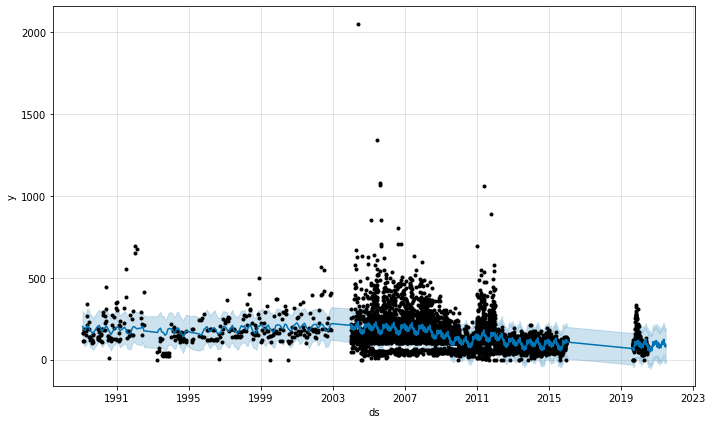

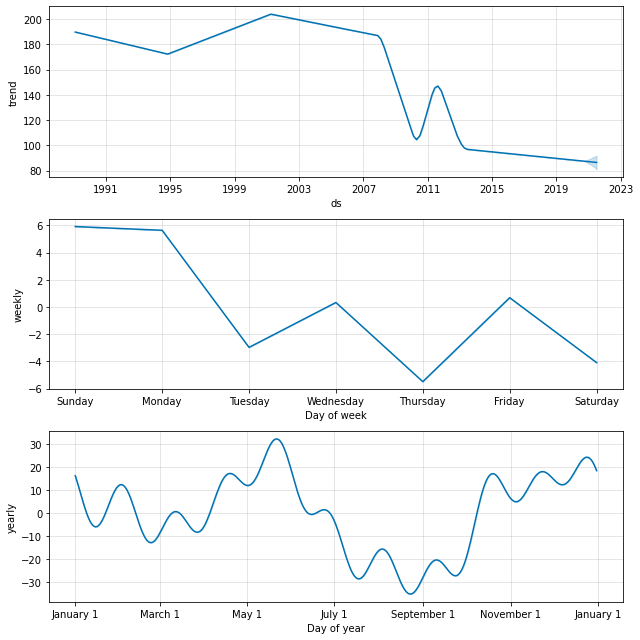

In [ ]:
train_df = cha
train_df.rename(mapper = {'Date':'ds','AQI':'y'},axis =1,inplace = True)
m = Prophet(holidays_prior_scale=0,seasonality_prior_scale=20,n_changepoints= 50,)
m.fit(train_df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
dff=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dff.to_csv(r"/content/drive/My Drive/datasets/Chandigarh.csv")
m.plot(forecast,uncertainty=True)
plt.savefig('Chandigarh-Uncertainty.png')
i=m.plot_components(forecast)
plt.savefig('Chandigarh-Forecast.png')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4337,2021-06-27,93.052411,-4.929597,188.533940
4338,2021-06-28,92.051380,-7.479319,188.760486
4339,2021-06-29,82.495940,-20.807195,182.939683
4340,2021-06-30,84.640224,-17.095914,183.322259
4341,2021-07-01,77.454349,-17.949797,181.496941


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


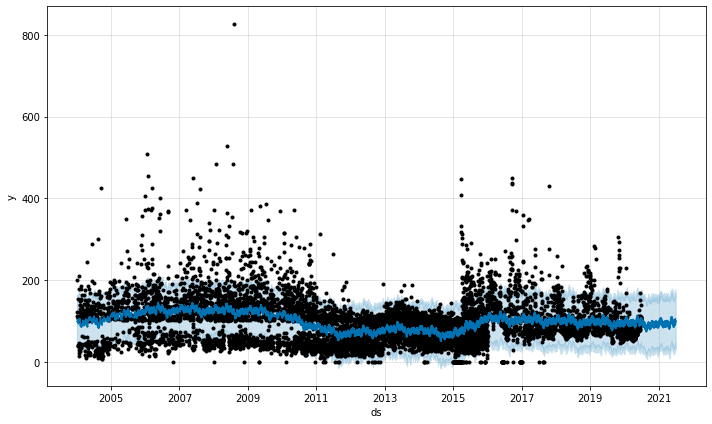

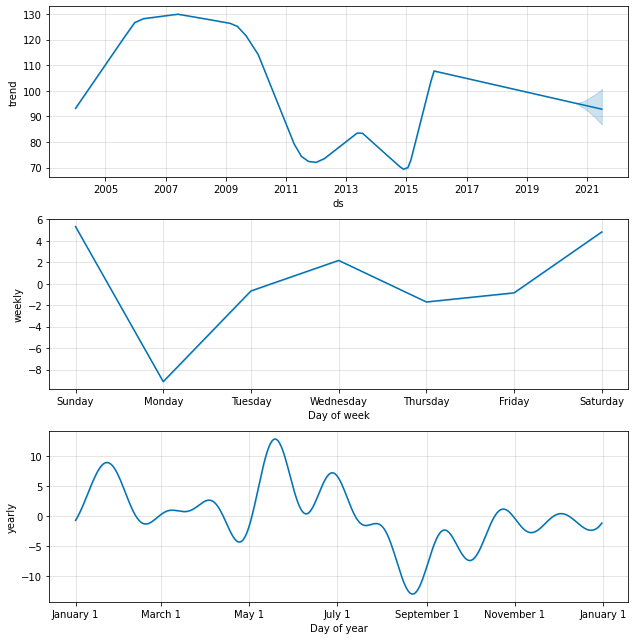

In [ ]:
train_df = che
train_df.rename(mapper = {'Date':'ds','AQI':'y'},axis =1,inplace = True)
m = Prophet(holidays_prior_scale=0,seasonality_prior_scale=20,n_changepoints= 50,)
m.fit(train_df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
dff=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dff.to_csv(r"/content/drive/My Drive/datasets/Chennai.csv")
m.plot(forecast,uncertainty=True)
plt.savefig('Chennai-Uncertainty.png')
i=m.plot_components(forecast)
plt.savefig('Chennai-Forecast.png')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4745,2021-06-27,105.344047,46.087010,177.429958
4746,2021-06-28,90.895177,27.514335,159.575029
4747,2021-06-29,99.250304,34.904478,161.569069
4748,2021-06-30,101.900366,40.360182,168.458943
4749,2021-07-01,97.747599,33.739571,165.461577


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


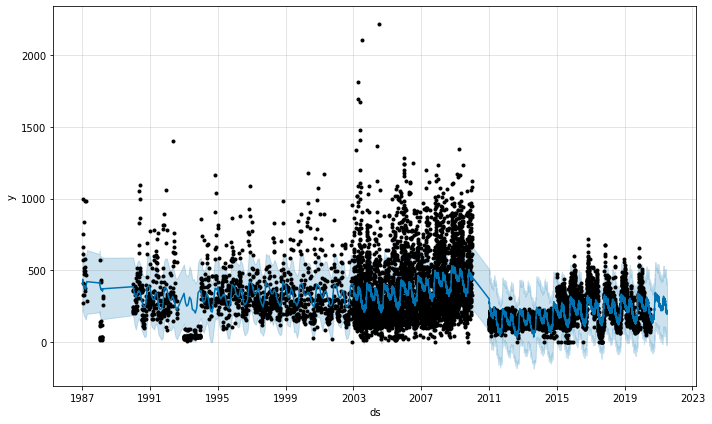

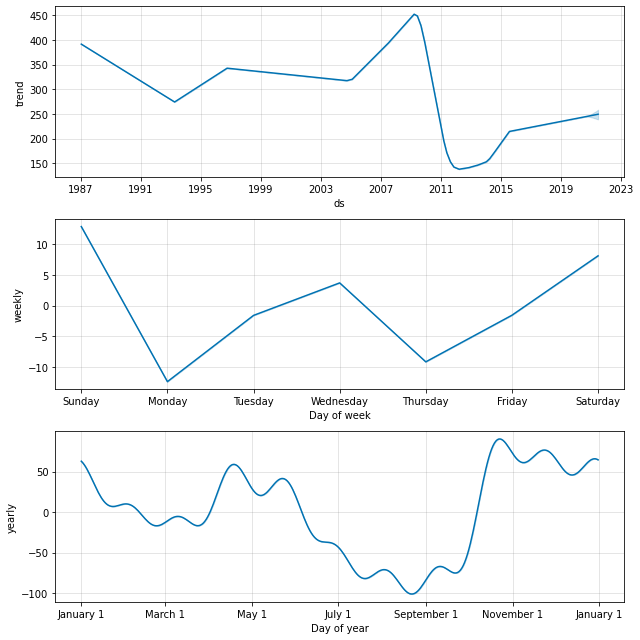

In [ ]:
train_df = deh
train_df.rename(mapper = {'Date':'ds','AQI':'y'},axis =1,inplace = True)
m = Prophet(holidays_prior_scale=0,seasonality_prior_scale=20,n_changepoints= 50,)
m.fit(train_df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
dff=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dff.to_csv(r"/content/drive/My Drive/datasets/Delhi.csv")
m.plot(forecast,uncertainty=True)
plt.savefig('Delhi-Uncertainty.png')
i=m.plot_components(forecast)
plt.savefig('Delhi-Forecast.png')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5192,2021-06-27,223.396646,11.889290,422.906787
5193,2021-06-28,197.295522,-24.309811,402.163296
5194,2021-06-29,207.081773,4.041897,404.873163
5195,2021-06-30,211.088607,7.569059,421.696143
5196,2021-07-01,196.621765,-6.839545,420.720655


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


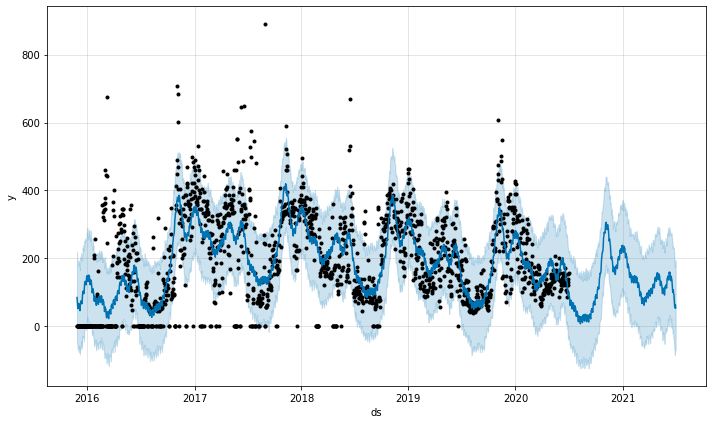

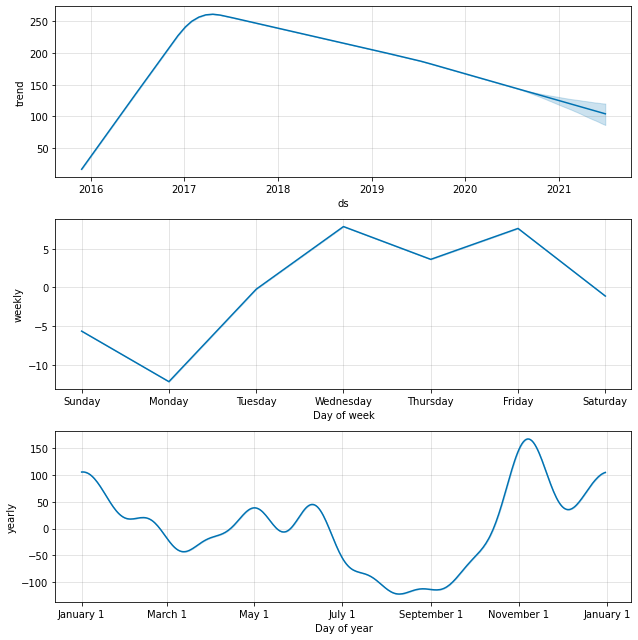

In [ ]:
train_df = gur
train_df.rename(mapper = {'Date':'ds','AQI':'y'},axis =1,inplace = True)
m = Prophet(holidays_prior_scale=0,seasonality_prior_scale=20,n_changepoints= 50,)
m.fit(train_df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
dff=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dff.to_csv(r"/content/drive/My Drive/datasets/Gurugram.csv")
m.plot(forecast,uncertainty=True)
plt.savefig('Gurugram-Uncertainty.png')
i=m.plot_components(forecast)
plt.savefig('Gurugram-Forecast.png')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2039,2021-06-27,67.173257,-69.767011,190.651703
2040,2021-06-28,54.502126,-85.193567,175.189632
2041,2021-06-29,60.633230,-78.342015,189.263621
2042,2021-06-30,63.284709,-68.881591,194.780189
2043,2021-07-01,54.007016,-67.508512,191.559039


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


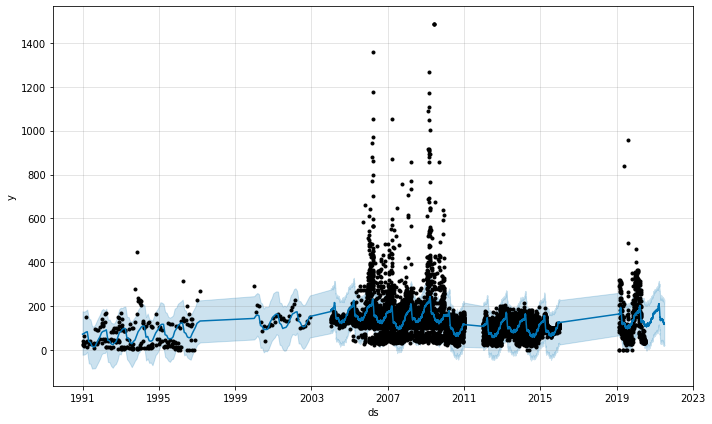

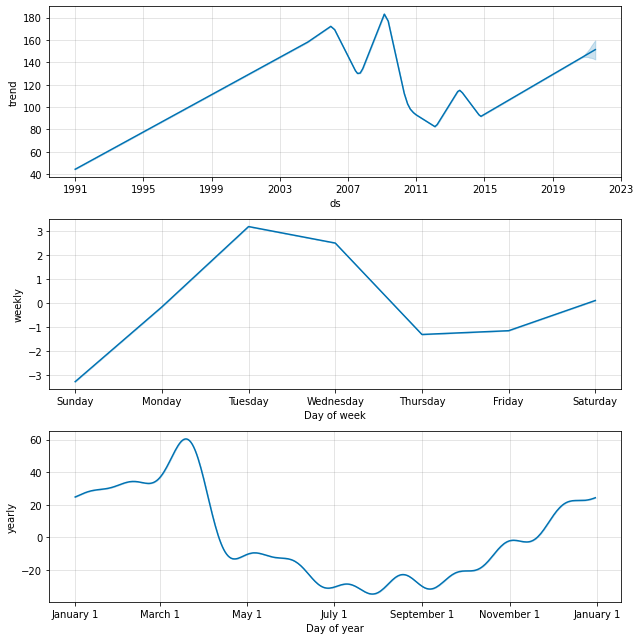

In [ ]:
train_df = guw
train_df.rename(mapper = {'Date':'ds','AQI':'y'},axis =1,inplace = True)
m = Prophet(holidays_prior_scale=0,seasonality_prior_scale=20,n_changepoints= 50,)
m.fit(train_df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
dff=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dff.to_csv(r"/content/drive/My Drive/datasets/Guwahati.csv")
m.plot(forecast,uncertainty=True)
plt.savefig('Guwahati-Uncertainty.png')
i=m.plot_components(forecast)
plt.savefig('Guwahati-Forecast.png')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3756,2021-06-27,116.963140,25.589431,212.506641
3757,2021-06-28,120.138321,22.931885,221.216336
3758,2021-06-29,123.624125,21.221856,222.648481
3759,2021-06-30,123.144975,23.410956,231.221306
3760,2021-07-01,119.599344,21.377413,223.122941


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


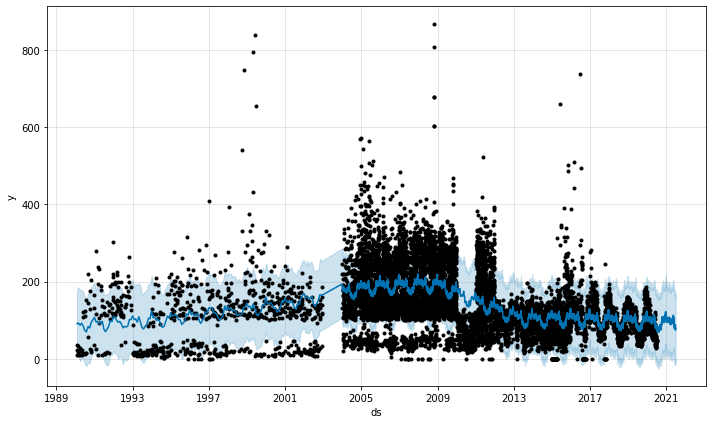

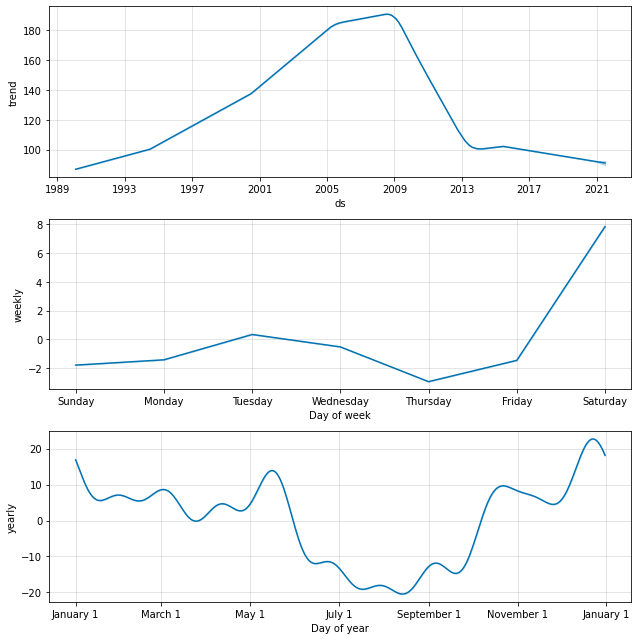

In [ ]:
train_df = hyd
train_df.rename(mapper = {'Date':'ds','AQI':'y'},axis =1,inplace = True)
m = Prophet(holidays_prior_scale=0,seasonality_prior_scale=20,n_changepoints= 50,)
m.fit(train_df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
dff=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dff.to_csv(r"/content/drive/My Drive/datasets/Hyderabad.csv")
m.plot(forecast,uncertainty=True)
plt.savefig('Hyderabad-Uncertainty.png')
i=m.plot_components(forecast)
plt.savefig('Hyderabad-Forecast.png')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4825,2021-06-27,77.349354,-10.846957,166.469392
4826,2021-06-28,77.458246,-12.239196,158.860966
4827,2021-06-29,78.904418,-8.504396,171.590691
4828,2021-06-30,77.666195,-6.258399,167.921651
4829,2021-07-01,74.820829,-11.747805,166.983592


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


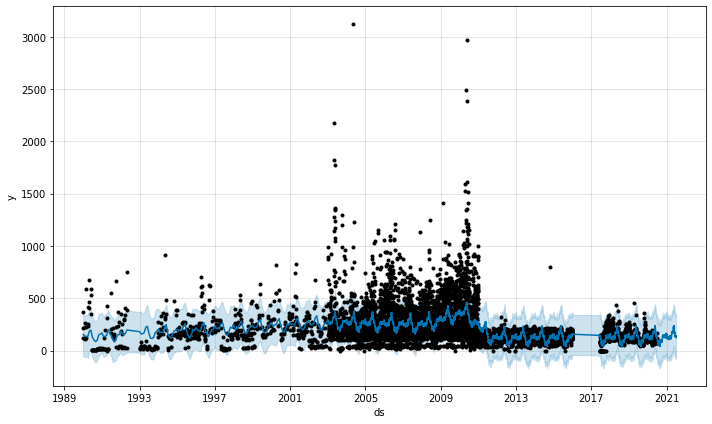

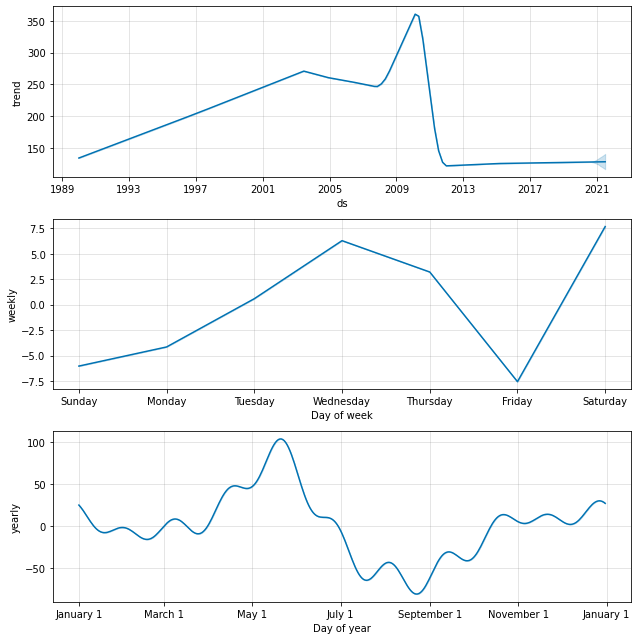

In [ ]:
train_df = jai
train_df.rename(mapper = {'Date':'ds','AQI':'y'},axis =1,inplace = True)
m = Prophet(holidays_prior_scale=0,seasonality_prior_scale=20,n_changepoints= 50,)
m.fit(train_df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
dff=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dff.to_csv(r"/content/drive/My Drive/datasets/Jaipur.csv")
m.plot(forecast,uncertainty=True)
plt.savefig('Jaipur-Uncertainty.png')
i=m.plot_components(forecast)
plt.savefig('Jaipur-Forecast.png')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5393,2021-06-27,127.354251,-68.781961,330.233671
5394,2021-06-28,127.158792,-75.577811,335.110020
5395,2021-06-29,129.405410,-69.000635,342.019552
5396,2021-06-30,132.196291,-61.275638,328.659494
5397,2021-07-01,125.803948,-74.222153,324.773723


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


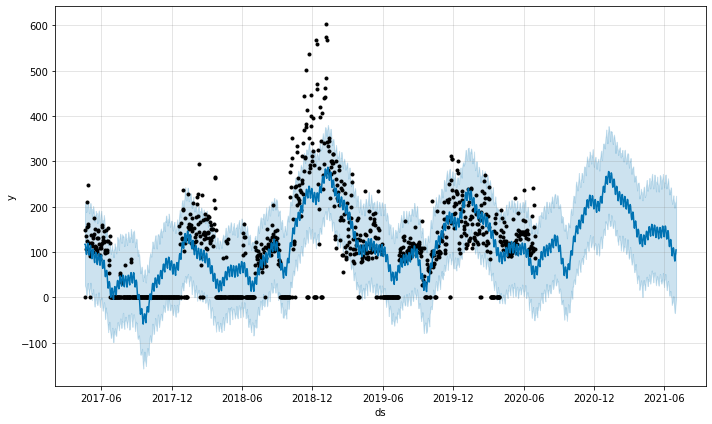

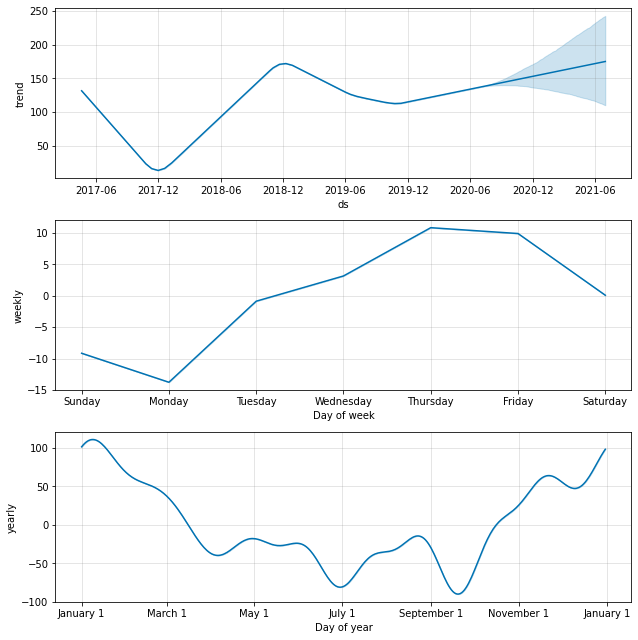

In [ ]:
train_df = jor
train_df.rename(mapper = {'Date':'ds','AQI':'y'},axis =1,inplace = True)
m = Prophet(holidays_prior_scale=0,seasonality_prior_scale=20,n_changepoints= 50,)
m.fit(train_df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
dff=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dff.to_csv(r"/content/drive/My Drive/datasets/Jorapokhar.csv")
m.plot(forecast,uncertainty=True)
plt.savefig('Jorapokhar-Uncertainty.png')
i=m.plot_components(forecast)
plt.savefig('Jorapokhar-Forecast.png')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1529,2021-06-27,85.389220,-32.425270,197.828341
1530,2021-06-28,80.094026,-34.575680,205.260393
1531,2021-06-29,92.653933,-22.934739,209.756079
1532,2021-06-30,96.709333,-13.802056,212.212783
1533,2021-07-01,104.789689,-2.328088,224.345926


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


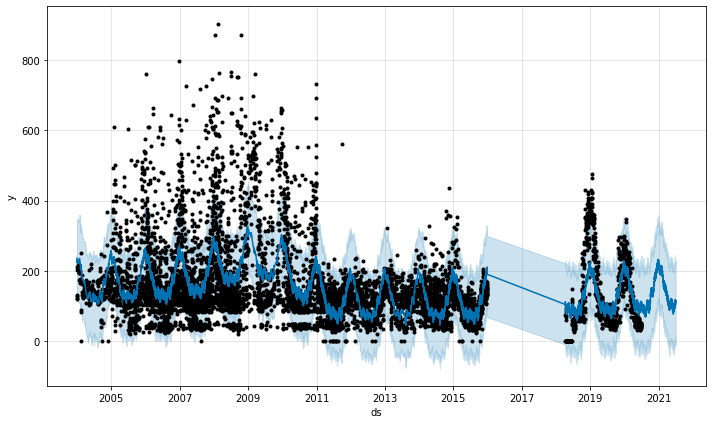

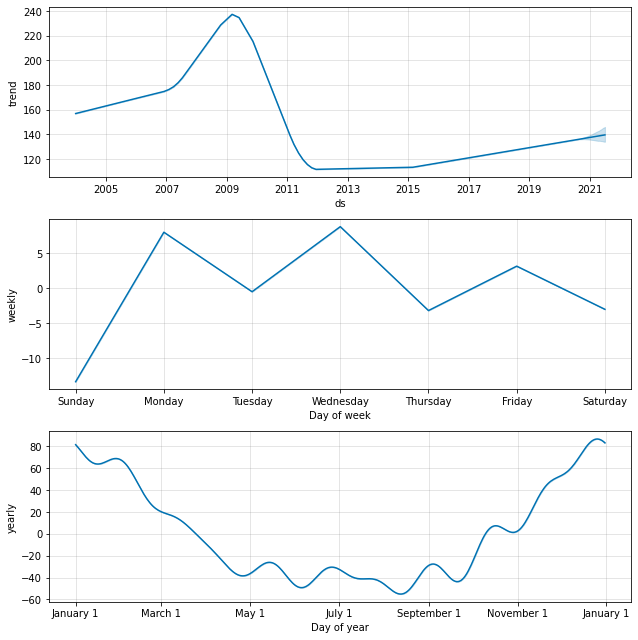

In [ ]:
train_df = kol
train_df.rename(mapper = {'Date':'ds','AQI':'y'},axis =1,inplace = True)
m = Prophet(holidays_prior_scale=0,seasonality_prior_scale=20,n_changepoints= 50,)
m.fit(train_df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
dff=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dff.to_csv(r"/content/drive/My Drive/datasets/Kolkata.csv")
m.plot(forecast,uncertainty=True)
plt.savefig('Kolkata-Uncertainty.png')
i=m.plot_components(forecast)
plt.savefig('Kolkata-Forecast.png')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4312,2021-06-27,95.611791,-11.410916,213.764068
4313,2021-06-28,116.852149,1.923724,233.033980
4314,2021-06-29,107.939516,-7.065710,232.914193
4315,2021-06-30,116.770253,11.619628,227.692337
4316,2021-07-01,104.099181,-11.344374,217.996871


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


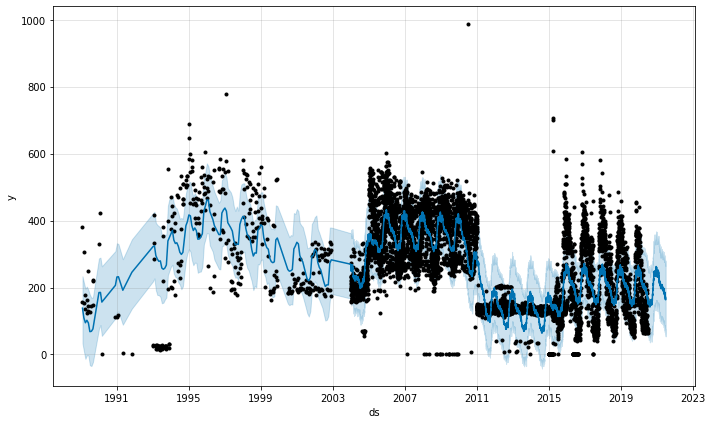

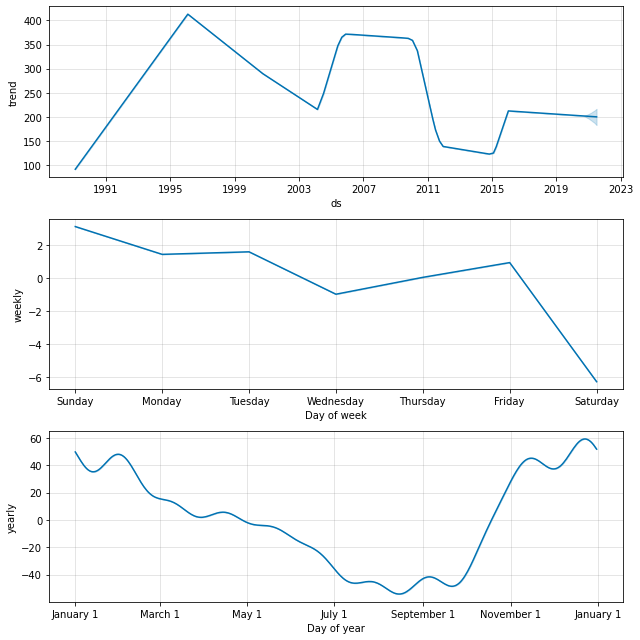

In [ ]:
train_df = luc
train_df.rename(mapper = {'Date':'ds','AQI':'y'},axis =1,inplace = True)
m = Prophet(holidays_prior_scale=0,seasonality_prior_scale=20,n_changepoints= 50,)
m.fit(train_df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
dff=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dff.to_csv(r"/content/drive/My Drive/datasets/Lucknow.csv")
m.plot(forecast,uncertainty=True)
plt.savefig('Lucknow-Uncertainty.png')
i=m.plot_components(forecast)
plt.savefig('Lucknow-Forecast.png')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5381,2021-06-27,172.368390,62.056086,276.340230
5382,2021-06-28,169.426185,61.990623,271.474335
5383,2021-06-29,168.308158,63.706037,269.152908
5384,2021-06-30,164.449741,58.458201,270.642020
5385,2021-07-01,164.201534,53.892871,263.490313


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


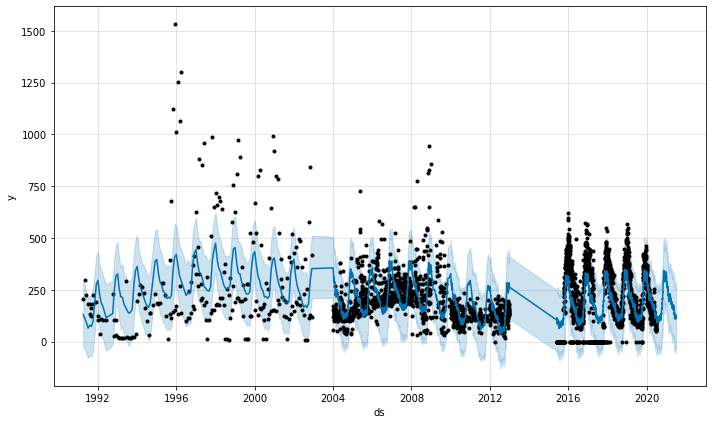

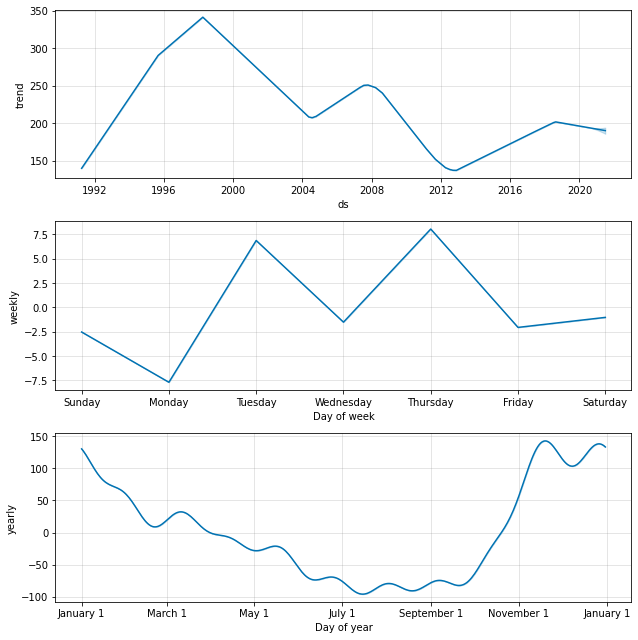

In [ ]:
train_df = pat
train_df.rename(mapper = {'Date':'ds','AQI':'y'},axis =1,inplace = True)
m = Prophet(holidays_prior_scale=0,seasonality_prior_scale=20,n_changepoints= 50,)
m.fit(train_df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
dff=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dff.to_csv(r"/content/drive/My Drive/datasets/Patna.csv")
m.plot(forecast,uncertainty=True)
plt.savefig('Patna-Uncertainty.png')
i=m.plot_components(forecast)
plt.savefig('Patna-Forecast.png')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3685,2021-06-27,116.944207,-33.893010,261.808991
3686,2021-06-28,110.822225,-48.424173,260.935029
3687,2021-06-29,124.213407,-23.470763,277.193566
3688,2021-06-30,114.427468,-33.822662,263.531965
3689,2021-07-01,122.423006,-24.277246,272.715086


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


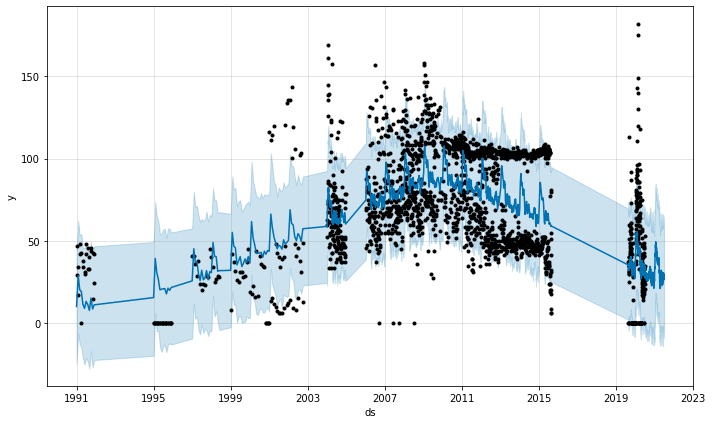

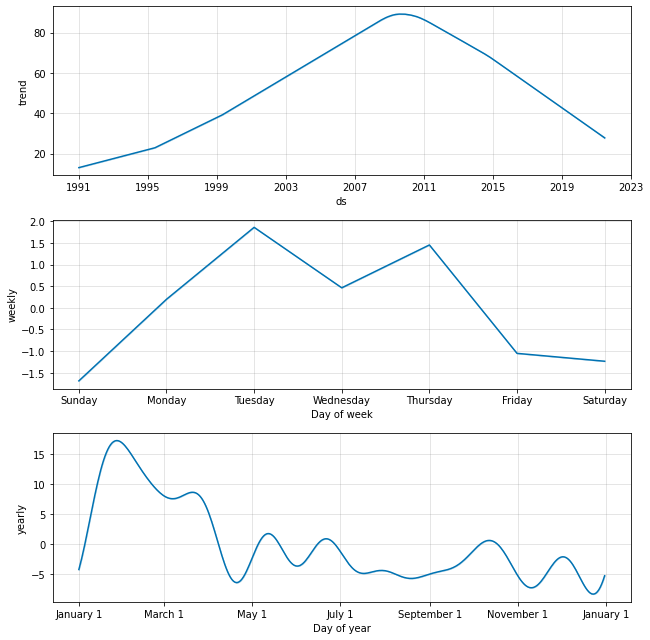

In [ ]:
train_df = shi
train_df.rename(mapper = {'Date':'ds','AQI':'y'},axis =1,inplace = True)
m = Prophet(holidays_prior_scale=0,seasonality_prior_scale=20,n_changepoints= 50,)
m.fit(train_df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
dff=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dff.to_csv(r"/content/drive/My Drive/datasets/Shillong.csv")
m.plot(forecast,uncertainty=True)
plt.savefig('Shillong-Uncertainty.png')
i=m.plot_components(forecast)
plt.savefig('Shillong-Forecast.png')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1834,2021-06-27,26.258125,-8.802640,59.446252
1835,2021-06-28,27.840476,-3.498391,60.373029
1836,2021-06-29,29.171244,-4.853064,62.422253
1837,2021-06-30,27.417534,-5.692207,60.854588
1838,2021-07-01,28.036920,-7.598385,59.686113


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


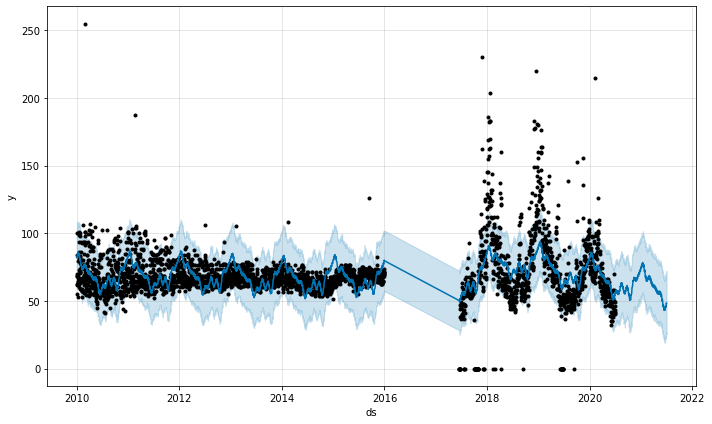

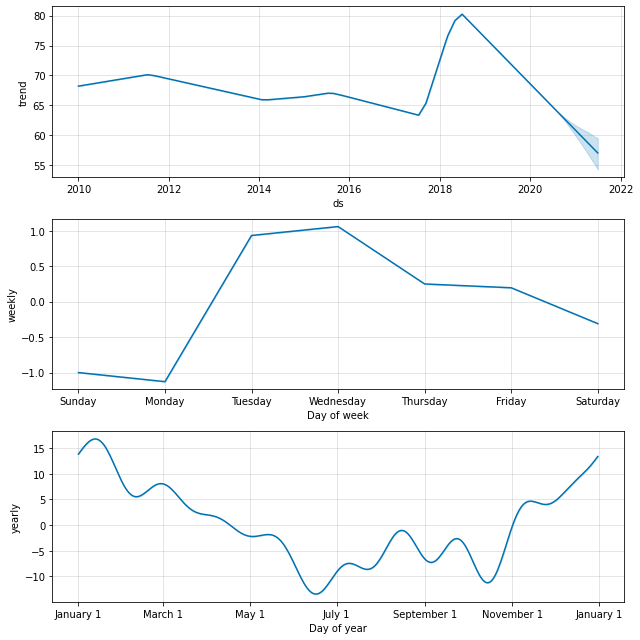

In [ ]:
train_df = thi
train_df.rename(mapper = {'Date':'ds','AQI':'y'},axis =1,inplace = True)
m = Prophet(holidays_prior_scale=0,seasonality_prior_scale=20,n_changepoints= 50,)
m.fit(train_df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
dff=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dff.to_csv(r"/content/drive/My Drive/datasets/Thiruvananthapuram.csv")
m.plot(forecast,uncertainty=True)
plt.savefig('Thiruvananthapuram-Uncertainty.png')
i=m.plot_components(forecast)
plt.savefig('Thiruvananthapuram-Forecast.png')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3024,2021-06-27,45.369044,22.085662,66.770706
3025,2021-06-28,45.627936,23.162500,69.019436
3026,2021-06-29,48.072758,25.365037,70.461828
3027,2021-06-30,48.567766,26.661227,72.206272
3028,2021-07-01,48.107174,25.468838,70.858562


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


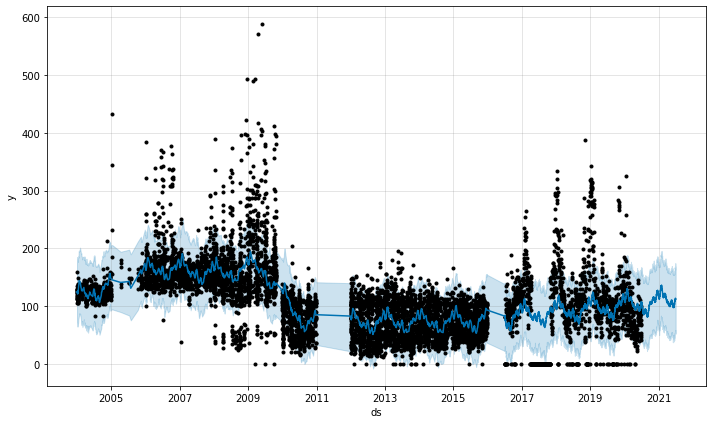

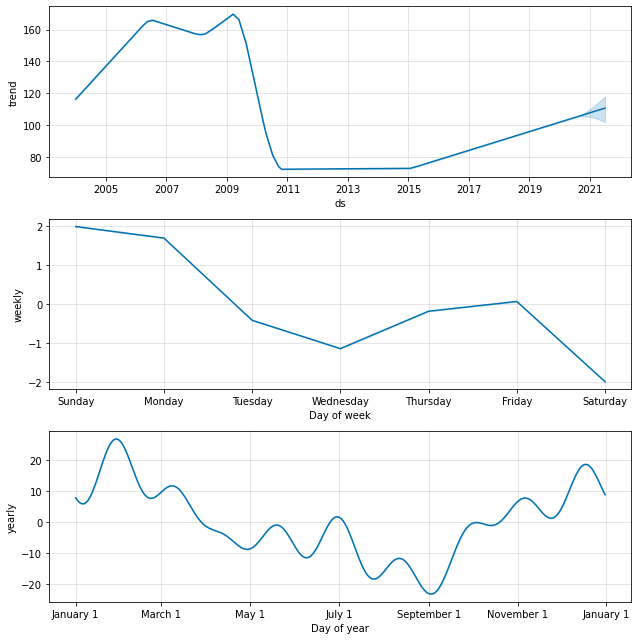

In [ ]:
train_df = vis
train_df.rename(mapper = {'Date':'ds','AQI':'y'},axis =1,inplace = True)
m = Prophet(holidays_prior_scale=0,seasonality_prior_scale=20,n_changepoints= 50,)
m.fit(train_df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
dff=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dff.to_csv(r"/content/drive/My Drive/datasets/Visakhapatnam.csv")
m.plot(forecast,uncertainty=True)
plt.savefig('Visakhapatnam-Uncertainty.png')
i=m.plot_components(forecast)
plt.savefig('Visakhapatnam-Forecast.png')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3008,2021-06-27,113.814964,57.072515,174.591974
3009,2021-06-28,113.885217,59.037891,170.360080
3010,2021-06-29,111.998409,53.329181,169.432010
3011,2021-06-30,111.335854,52.540972,163.777025
3012,2021-07-01,112.196238,55.354764,166.933544
